<a href="https://colab.research.google.com/github/MarsoL4/iot-iob-genAI/blob/main/sklearn_14_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importando a biblioteca fetch_openml para carregar o dataset
from sklearn.datasets import fetch_openml

In [5]:
# Carregando o dataset do OpenML
data_ecg = fetch_openml(data_id= 44793)
data_ecg

{'data':          col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
 0    -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
 1    -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
 2    -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
 3     0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
 4     0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4993  0.608558 -0.335651 -0.990948 -1.784153 -2.626145 -2.957065 -2.931897   
 4994 -2.060402 -2.860116 -3.405074 -3.748719 -3.513561 -3.006545 -2.234850   
 4995 -1.122969 -2.252925 -2.867628 -3.358605 -3.167849 -2.638360 -1.664162   
 4996 -0.547705 -1.889545 -2.839779 -3.457912 -3.929149 -3.966026 -3.492560   
 4997 -1.351779 -2.209006 -2.520225 -3.061475 -3.065141 -3.030739 -2.622720   
 
          col_7     col_8     col_9  ...  

In [6]:
# Separando os dados de entrada (features) e saída (target)
x = data_ecg.data #Dados de Entrada
y = data_ecg.target #Dados de Saida

In [7]:
# Contando a frequência das classes no target
y.value_counts()

,count
col_140,
1.0,2919
0.0,2079


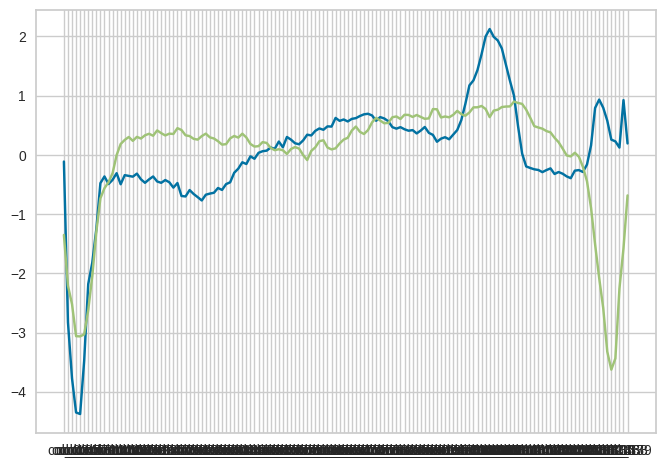

In [8]:
# Importando matplotlib e plotando as duas primeiras séries temporais
import matplotlib.pyplot as plt

plt.plot(x.iloc[0])
plt.plot(x.iloc[4997])

In [1]:
# Instalando a biblioteca pycaret
!pip install pycaret

In [9]:
# Configurando e comparando modelos de classificação com pycaret
from pycaret.classification import *

clf = setup(data = x, target = y, train_size= 0.8)

best = compare_models()

,Description,Value
0,Session id,8327
1,Target,col_140
2,Target type,Binary
3,Original data shape,"(4998, 141)"
4,Transformed data shape,"(4998, 141)"
5,Transformed train set shape,"(3998, 141)"
6,Transformed test set shape,"(1000, 141)"
7,Numeric features,140
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9932,0.9987,0.9974,0.9911,0.9942,0.9861,0.9861,0.4860
rf,Random Forest Classifier,0.9927,0.9986,0.9957,0.9919,0.9938,0.9851,0.9851,2.9320
lightgbm,Light Gradient Boosting Machine,0.9920,0.9984,0.9957,0.9907,0.9932,0.9835,0.9836,13.3170
knn,K Neighbors Classifier,0.9912,0.9957,0.9961,0.9890,0.9925,0.9819,0.9820,0.1780
xgboost,Extreme Gradient Boosting,0.9912,0.9988,0.9949,0.9902,0.9925,0.9820,0.9820,1.0620
gbc,Gradient Boosting Classifier,0.9900,0.9986,0.9936,0.9894,0.9915,0.9794,0.9794,18.2840
lr,Logistic Regression,0.9885,0.9968,0.9944,0.9861,0.9902,0.9763,0.9764,1.0230
svm,SVM - Linear Kernel,0.9880,0.9975,0.9889,0.9906,0.9897,0.9753,0.9754,0.1290
qda,Quadratic Discriminant Analysis,0.9880,0.9908,0.9910,0.9885,0.9897,0.9753,0.9754,0.1300
ada,Ada Boost Classifier,0.9875,0.9969,0.9919,0.9868,0.9893,0.9742,0.9743,3.8040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

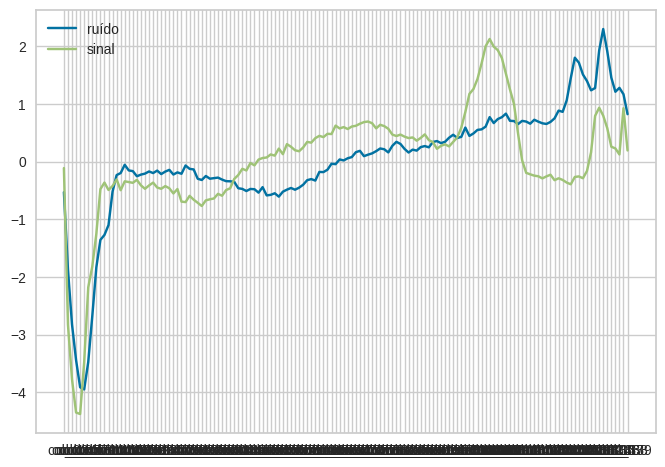

In [28]:
# Adicionando ruído a uma série temporal e plotando com a original
import random
ruido = random.random()
sinal_ruido = x.iloc[4996] + ruido
plt.plot(sinal_ruido, label= 'ruído')
plt.plot(x.iloc[0], label= 'sinal')
plt.legend()

In [31]:
# Classificando a série temporal com ruído usando o melhor modelo
print(f"A classificação é: {best.predict(sinal_ruido.to_frame().T)}")

A classificação é: [0.]


In [37]:
# Criando um DataFrame com os dados e o target e exibindo estatísticas descritivas
import pandas as pd

df = pd.DataFrame(x)
df['target'] = pd.DataFrame(y)
df.head()

# Processamento do Sinal
# Não Funciona -> df.describe()



,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [43]:
# Estatística
import numpy as np

x_array = np.array(x) # Transforma os dados em vetor
x_media = []

for linhas in x_array:
  x_media.append(np.mean(linhas))
  x_media_var

x_media = np.array(x_media)
x_media.shape

(4998,)

In [36]:
def media_harmonica(vetor):
  return len(vetor) / np.sum(1/vetor)

dados = {
    'media_aritmetica': np.mean(x),
    'media_geometrica': np.prod(x),
    'media_harmonica': media_harmonica(x),
    'variancia': np.var(x),
    'desvio_padrao': np.std(x),
    'maximo': np.max(x),
    'minimo': np.min(x),
    'mediana': np.median(x),
}

dados

{'media_aritmetica': -2.3894493274376404e-12,
 'media_geometrica': col_0     -0.0
 col_1     -inf
 col_2     -inf
 col_3      inf
 col_4     -inf
           ... 
 col_135   -inf
 col_136    inf
 col_137   -0.0
 col_138    0.0
 col_139    0.0
 Length: 140, dtype: float64,
 'media_harmonica': col_0      -1.378593
 col_1      -0.460801
 col_2      -2.272431
 col_3      -5.566692
 col_4      -2.310655
              ...    
 col_135    48.365685
 col_136    -1.877759
 col_137    -0.856487
 col_138     2.981317
 col_139   -15.271865
 Length: 140, dtype: float64,
 'variancia': col_0      1.327875
 col_1      2.089175
 col_2      1.921878
 col_3      1.697264
 col_4      1.219754
              ...   
 col_135    4.351069
 col_136    4.227508
 col_137    3.456712
 col_138    3.352214
 col_139    2.000166
 Length: 140, dtype: float64,
 'desvio_padrao': col_0      1.152334
 col_1      1.445398
 col_2      1.386318
 col_3      1.302791
 col_4      1.104425
              ...   
 col_135    2.085922